## Import Libraries

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

## Downloading the data

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

# we don't need the validation data for this exercise, we can pass validation_size=0
mnist = input_data.read_data_sets('MNIST/data', validation_size=0)

# extract the images that will be used for training the autoencoder
train_images = mnist.train.images

## Exploratory Data Analysis

Shape of train images (60000, 784)


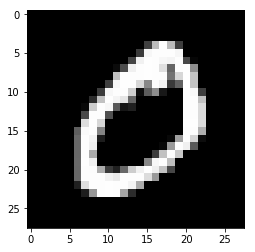

In [3]:
# Let's see how many images are there in the training set
print("Shape of train images {}".format(train_images.shape))

# let's check a sample image
sample_image = train_images[1]
plt.imshow(sample_image.reshape(28,28), cmap="Greys_r")

## Helper Functions

In [0]:
def plot_images(original, reconstructed):
  fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(12,4))

  for images, row in zip([original, reconstructed], axes):
      for img, ax in zip(images, row):
          ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)

  fig.tight_layout(pad=0.1)

## Define the Placeholders

In [0]:
image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='inputs')
targets = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='targets')

## Define the Model
 
 One hidden layer with relu activation and an output layer with sigmoid activation

In [0]:
def model(inputs, encoding_dim, output_dim, activation=tf.nn.relu):
  
  #enocder netowrk
  encoded = tf.contrib.layers.fully_connected(inputs, encoding_dim, activation_fn=activation)
  #output layer
  logits = tf.contrib.layers.fully_connected(encoded, output_dim, activation_fn=None)
  
  #final output
  decoded = tf.nn.sigmoid(logits, name='outputs')
  
  return encoded, decoded, logits

## Define the Operations

In [0]:
def create_train_operations(logits, targets, learning_rate):
   
    #compute the loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets))
    #define the training operation
    train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    
    return loss, train_op

## Train the model and plot the reconstructed images

In [0]:
def train_model(inputs, targets, n_epochs, batch_size, encoding_dim, output_dim, learning_rate):
  encoded, decoded, logits = model(inputs, encoding_dim, output_dim)
  loss, training_op = create_train_operations(logits, targets, learning_rate)
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(n_epochs):
      epoch_loss = 0
      for batch in range(mnist.train.num_examples//batch_size):
        images, labels = mnist.train.next_batch(batch_size)
        train_loss, _ = sess.run([loss, training_op], feed_dict = {inputs:images, targets:images})
        epoch_loss += train_loss
      print("Epoch {}/{} : Loss {:.3f}".format(epoch+1, n_epochs, epoch_loss))

    print("Training is done\n")
    
    print("Plotting the reconstructed images")
    test_images = mnist.test.images[:10]
    reconstructed = sess.run(decoded, feed_dict={inputs: test_images})
    plot_images(test_images, reconstructed)

## Define the Model Parameters

In [0]:
n_epochs = 20
batch_size = 200
encoding_dim = 32
output_dim = image_size
learning_rate = 0.001

## Run the Model


W0622 20:27:57.178109 140189032003456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20 : Loss 76.106
Epoch 2/20 : Loss 48.067
Epoch 3/20 : Loss 40.531
Epoch 4/20 : Loss 36.038
Epoch 5/20 : Loss 33.300
Epoch 6/20 : Loss 31.511
Epoch 7/20 : Loss 30.282
Epoch 8/20 : Loss 29.437
Epoch 9/20 : Loss 28.898
Epoch 10/20 : Loss 28.590
Epoch 11/20 : Loss 28.402
Epoch 12/20 : Loss 28.287
Epoch 13/20 : Loss 28.204
Epoch 14/20 : Loss 28.145
Epoch 15/20 : Loss 28.099
Epoch 16/20 : Loss 28.058
Epoch 17/20 : Loss 28.029
Epoch 18/20 : Loss 28.006
Epoch 19/20 : Loss 27.983
Epoch 20/20 : Loss 27.958
Training is done

Plotting the reconstructed images


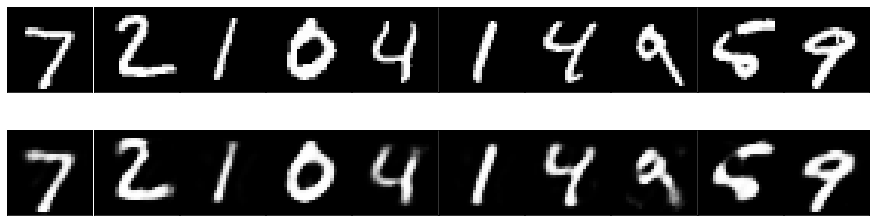

In [10]:
train_model(inputs = inputs, 
            targets = targets,
            n_epochs = n_epochs, 
            batch_size = batch_size,
            encoding_dim = encoding_dim,
            output_dim = output_dim,
            learning_rate = learning_rate)